<a href="https://colab.research.google.com/github/anshupandey/Computer-Vision/blob/master/Case_study_Image_Processing_Fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Session 1: Image Processing Fundamentals</center></h1>

## Table of Contents
* [1. Introduction to Image Processing](#1.-Introduction-to-Image-Processing)  
* [2. Image Data Generator in Keras](#2.-Image-Data-Generator-in-Keras) 
    * [2.1 Why do we use Image Data Generator?](#2.1-Why-do-we-use-Image-Data-Generator?)
    * [2.2 Tools required](#2.2-Tools-required)
* [3. Reading images using Image Data Generator](#3.-Reading-images-using-Image-Data-Generator)
    * [3.1 Read images from default dataset using flow method](#3.1-Read-images-from-default-dataset-using-flow-method)
    * [3.2 Read images from directory using flow_directory method](#3.2-Read-images-from-directory-using-flow_directory-method)
    * [3.3 Access properties of image](#3.3-Access-properties-of-image)
    * [3.4 Display images](#3.4-Display-images)
* [4. Image Preprocessing Techniques using Image Data Generator](#4.-Image-Preprocessing-Techniques-using-Image-Data-Generator)
    * [4.1 Color Conversion: Grayscaling an image](#4.1-Color-Conversion:-Grayscaling-an-image)
    * [4.2 Rescaling an image](#4.2-Rescaling-an-image)
    * [4.3 Featurewise standardization](#4.3-Featurewise-standardization)
    * [4.4 Rotating an image](#4.4-Rotating-an-image)
    * [4.5 Shifting an image](#4.5-Shifting-an-image)
        * [4.5.1 Horizontal shift](#4.5.1-Horizontal-shift)
        * [4.5.2 Vertical shift](#4.5.2-Vertical-shift)
    * [4.6 Flipping an image](#4.6-Flipping-an-image)
    * [4.7 Zooming an image](#4.7-Zooming-an-image)
    * [4.8 Shearing an image](#4.8-Shearing-an-image)
* [5. Combination of all Image Preprocessing techniques](#5.-Combination-of-all-Image-Preprocessing-techniques)

## 1. Introduction to Image Processing 

Humans have the sense of vision to observe the world using colors and patterns. But computers cannot understand these colors and patterns. Computers see and interpret digital image by breaking them into a grid of small individual units called **pixels**.

Each image is a three-dimensional arrangement of small pixels units. Hence computers can understand an image as a matrix of numbers.
Using this matrix of numbers, computers can understand and interpret the image. 

Below is an example of image matrix.
The matrix of the portion of the image in the red box is shown on the right:


**Image Processing** is the field of studying and analyzing images. The objective is to identify different image features, such as **lines, edges, colors** and slowly move to advanced topics such as **detecting faces and objects**.
<br> Image Processing is a very active area of research and has huge applications in **medicine, banking, aerospace and even self driving cars**.  

## 2. Image Data Generator in Keras 

Image Data Generator is a special package to perform **image processing in Keras** which is really helpful in Deep Learning operations. These are the operations you can perform:

* Feature wise standardization
* Random rotation
* Random shift
* Random flips

<h3> <center> <b>Operations in Image Data Generator</b>  </center>   </h3>
<img src='2018-10-24.png'>

<br>

### 2.1 Why do we use Image Data Generator?

** Image Data Generator** is prefered over OpenCV for image processing in deep learning.  <br>

Unlike OpenCV which performs the operations and stores them in memory, Image Data Generator performs image processing during the process of model fitting. This process requires less memory and is efficient for deep learning application.

### 2.2 Tools required

Image Data Generator package can be imported by the following command.  <br>
** from keras.preprocessing.image import ImageDataGenerator **

You can easily create an object of Image Data Generator using  <br>
**datagen = ImageDataGenerator()**

##### Let's import the necessary packages 

In [ ]:
%matplotlib inline
from tensorflow.keras.preprocessing import image

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Creating object of ImageDataGenerator class

datagen = ImageDataGenerator()

## 3. Reading images using Image Data Generator

We can perform operations on images using two methods:
* flow()
* flow_from_directory

** flow() ** : This is used when you have less amount of data. You need to pass the inputs and the labels. The inputs should be  numpy of rank 4.

** flow_from_directory() ** : This is a very helpful function to read data, when you have a large amount of images. The images are given in different folders where each folder corresponds to a class. Hence we don't need to provide inputs and labels and instead pass the image directory.

### 3.1 Read images from default dataset using flow method

#### flow()

**Arguments**
- x: Input data. Numpy array of rank 4 or a tuple.
- y: Labels. One hot encoded label 
- batch_size: int (default=32)
- shuffle: Boolean (default: True).
- sample_weight: Sample weights.
- seed: Int (default: None).

In [ ]:
# load cifar10 data from keras

from tensorflow.keras.datasets import cifar10

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

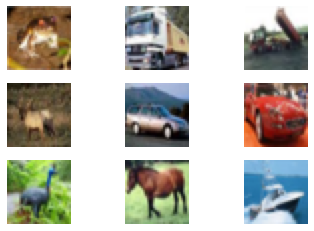

In [ ]:
# Displaying original images

for i in range(0,9):
    plt.subplot(330+1+i)
    image = X_train[i]
    plt.imshow(image.astype('uint8'))
    plt.axis('off')

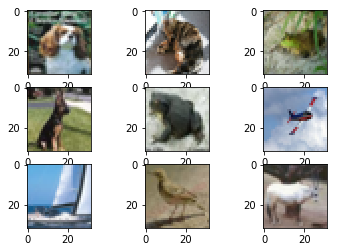

In [ ]:
datagen = ImageDataGenerator()

# fit parameters from data
datagen.fit(X_train)

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].astype('uint8'))
    break

### 3.2 Read images from directory using flow_directory method

#### flow_from_directory

This function is used to read images from folders. The labels are automatically identified based on the folders where they are stored. Here are the arguments of flow_from_directory:
- directory: Path to a subdirectory. It should contain one sub directory per class. 
- target_size: The input image is resized to this size
- color_mode: It can be 'grayscale', 'rgb' and 'rgba'. Images will be converted to 1, 3 or 4 channels
- classes: Optional list of class subdirectory. If this is not provided, classes are inferred from sub directory name
- class_mode: binary for 2 classes or categorical for multiple classes.
- batch_size: size of batches of data(default=32)
- shuffle: whether to shuffle the data(default=True)
- seed: Optional random seed for shuffling and transformations.

In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
   creating: dataset/cars/
  inflating: dataset/cars/car.10.jpeg  
  inflating: dataset/cars/car.3.jpg  
  inflating: dataset/cars/car.4.png  
  inflating: dataset/cars/car.5.jpg  
  inflating: dataset/cars/car.6.jpg  
  inflating: dataset/cars/car.7.jpg  
  inflating: dataset/cars/car.8.jpg  
   creating: dataset/cats/
  inflating: dataset/cats/cat.1.jpg  
  inflating: dataset/cats/cat.10.jpg  
  inflating: dataset/cats/cat.11.jpg  
  inflating: dataset/cats/cat.2.jpg  
  inflating: dataset/cats/cat.3.jpg  
  inflating: dataset/cats/cat.4.jpg  
  inflating: dataset/cats/cat.5.jpg  
  inflating: dataset/cats/cat.7.jpg  
  inflating: dataset/cats/cat.8.jpg  
  inflating: dataset/cats/cat.9.jpg  
   creating: dataset/dogs/
  inflating: dataset/dogs/dog.0.jpg  
  inflating: dataset/dogs/dog.1.jpg  
  inflating: dataset/dogs/dog.2.jpg  
  inflating: dataset/dogs/dog.3.jpg  
  inflating: dataset/dogs/dog.4.jpg  
  inflating: dataset/dogs/dog.5.jpg  
  inflating: datase

In [ ]:
training_generator = datagen.flow_from_directory(
        'dataset',
        color_mode="rgb",
        batch_size=32,
        class_mode="categorical",                                  # This has more than 2 classes
        shuffle=True,
        seed=42,
        target_size=(224, 224))

Found 27 images belonging to 3 classes.


** There are 27 images in 3 classes. Cats, Cars and Dogs. **

### 3.3 Access properties of image

In [ ]:
Xbatch, Ybatch = training_generator.next()

In [ ]:
#Total shape of images
Xbatch.shape

(27, 224, 224, 3)

This is a 4 dimensional array with 30 images, 224 pixel width, 224 pixel height and 3 color channel.

In [ ]:
#Shape of labels of imges
Ybatch.shape

(27, 3)

This is a 2 dimensional array with 30 rows(images) and 3 columns(class of image)

In [ ]:
Ybatch[:5,]

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], dtype=float32)

** Observation: The classes are represented with the above array. The 1's represent the positive class. **

In [ ]:
Xbatch[0].shape

(224, 224, 3)

** Observation: 224 X 224 X 3 is the shape of the output image. **

### 3.4 Display images

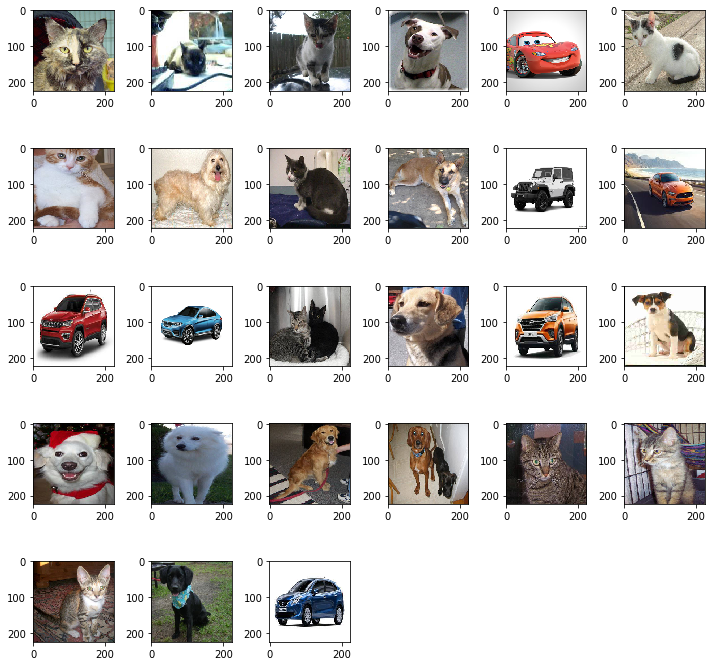

In [ ]:
batch_size = 9
i=0
plt.figure(figsize=(10,10))

for img in Xbatch:
    plt.subplot(5,6, i+1)
    plt.tight_layout()
    plt.imshow(img.astype('uint8'))
    i=i+1    

## 4. Image Preprocessing Techniques using Image Data Generator

### 4.1 Color Conversion: Grayscaling an image

Color images are 3 dimensional array with the third dimension representing the RGB values. 
In a lot of image classification tasks, the color of images do not provide additional information and can be performed on grayscale images. This is why we perform grayscaling.

** The above image was read in Imagedatagenerator with color_mode='rgb'. **  

** Setting color_mode = 'grayscale' performs this operation. **

In [ ]:
!wget -q https://www.dropbox.com/s/8v5yodd5vz83q1o/dataset.zip

In [ ]:
gray_training_generator = datagen.flow_from_directory(
        'dataset',
        color_mode="grayscale",
        batch_size=32,
        class_mode="categorical",                                  # This has more than 2 classes
        shuffle=True,
        seed=42,
        target_size=(224, 224))

Found 27 images belonging to 3 classes.


In [ ]:
XbatchGray, YbatchGray = gray_training_generator.next()

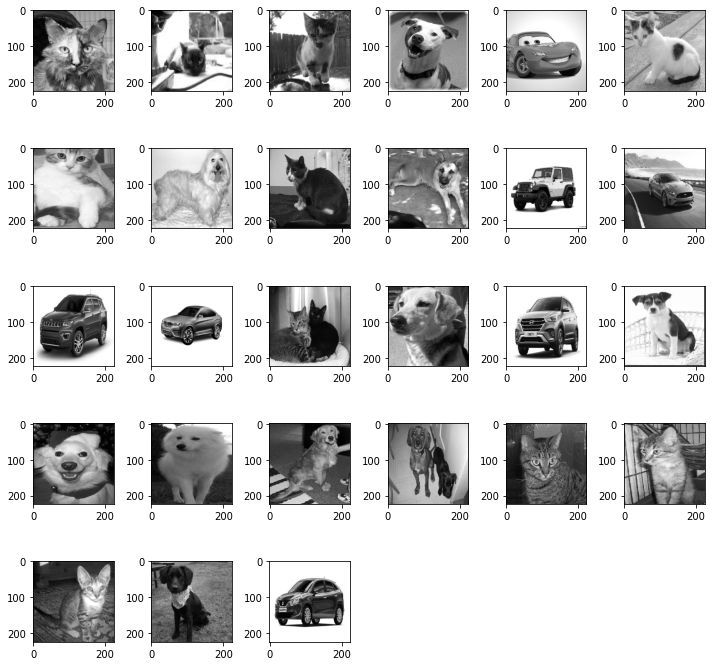

In [ ]:
batch_size = 9
i=0
plt.figure(figsize=(10,10))

for img in XbatchGray:
    plt.subplot(5,6, i+1)
    plt.tight_layout()
    gray_img = img[:,:,0]
    plt.imshow(gray_img.astype('uint8'), cmap='gray')
    i=i+1    

### 4.2 Rescaling an image

Most of the images are stored in RGB(Red, Green, Blue) format. In each dimension, the data is stored spatially using pixels whose values are stored as 8 bit unsigned integer type(range from 0 to 255). 

**Rescaling** is an operation where the pixel values are restricted from 0 to 1. In deep neural networks you might want to restrict your input to the range from 0 to 1, due to possible overflow, optimization, stability issues, and so on.

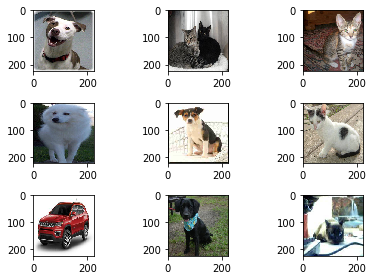

In [ ]:
datagen = ImageDataGenerator(rescale= 1. / 255.)
datagen.fit(Xbatch)
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img)
        i=i+1    
    if i >= batch_size:
        break

** The pixel values in these images are between 0 to 1 instead of 0 to 255.**  <br>
The images looks the same as original, but their values are different.

### 4.3 Featurewise standardization

In tabular data, the values are standardized along columns, so that they don't have much variance.<br>
In the same way it is possible to standardize the pixel values across the dataset.  

This can be done by using 2 arguments:
- featurewise_center = True
- featurewise_std_normalization = True

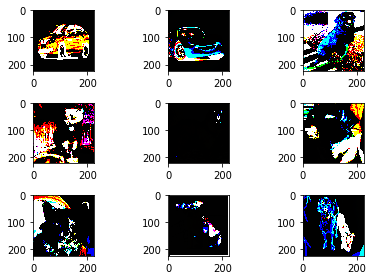

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(Xbatch)
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

### 4.4 Rotating an image

This transformation rotates an image in a certain direction either clockwise or anti-clockwise.

This can be done with the following argument:
- rotation_range=90

We specify the range, but the angle is choosen randomly.

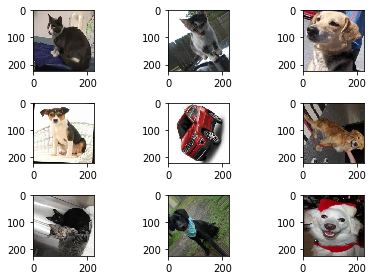

In [ ]:
datagen = ImageDataGenerator(rotation_range=90)
datagen.fit(Xbatch)

i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

### 4.5 Shifting an image

#### 4.5.1 Horizontal shift

This transformation shifts the image along the horizontal axis. The image is shifted either left or right.
This can be done using 2 arguments:
- width_shift_range: Takes some fraction value less than 1.
- fill_mode: 'constant','nearest','reflect','wrap'

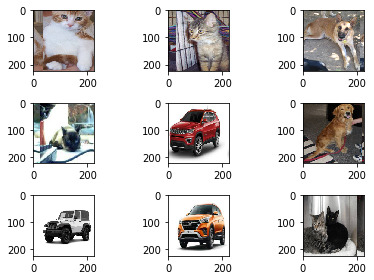

In [ ]:

shift = 0.2
datagen = ImageDataGenerator(width_shift_range=shift, fill_mode='wrap')
datagen.fit(Xbatch)
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

#### 4.5.2 Vertical shift

This transformation shifts the image either to the top or down.<br>
This can be done with 2 arguments:
- height_shift_range: Fractional value less than 1
- fill_mode: 'constant','nearest','reflect','wrap'

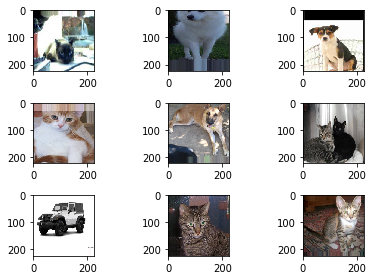

In [ ]:
shift = 0.2
datagen = ImageDataGenerator(height_shift_range=shift)
datagen.fit(Xbatch)
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

### 4.6 Flipping an image

This transformation flips the image according to the axis you have mentioned.  <br>
This requires two arguments:
- horizontal_flip: True, results a flip in x axis
- vertical_flip: True, results a flip in y axis

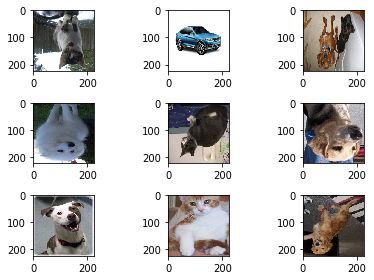

In [ ]:
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
datagen.fit(Xbatch)
batch_size = 9
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

### 4.7 Zooming an image

This transformation zooms the image either in or out. This is controlled using the **zoom_range** parameter.  <br>
zoom_range = 0.75.  <br>
The zooming factor will be choosen from (1-0.75) to (1+0.75) or (0.25) to (1.75)

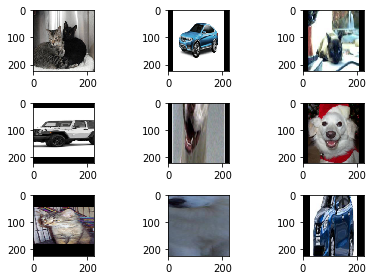

In [ ]:
datagen = ImageDataGenerator(zoom_range=0.75, fill_mode='constant')
datagen.fit(Xbatch)
batch_size = 9
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

### 4.8 Shearing an image

Shearing displaces each point in the vertical direction by an amount proportional to its distance from an edge of the image. Note that in general the direction can be arbitrary .

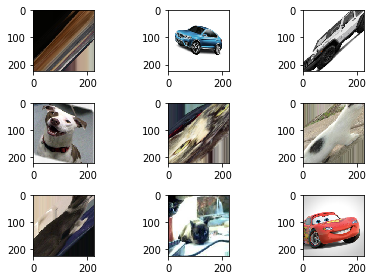

In [ ]:
datagen = ImageDataGenerator(shear_range=130)
datagen.fit(Xbatch)
batch_size = 9
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break

## 5. Combination of all Image Preprocessing techniques

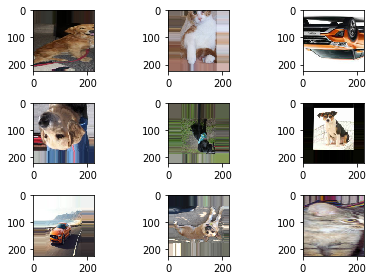

In [ ]:
datagen = ImageDataGenerator(
    vertical_flip=True, 
    horizontal_flip=True,
    height_shift_range=np.random.rand(),
    rotation_range=np.random.rand(), 
    zoom_range=np.random.rand(),
    shear_range=np.random.rand())

datagen.fit(Xbatch)
batch_size = 9
i=0
for img_batch in datagen.flow(Xbatch, batch_size=9):
    for img in img_batch:
        plt.subplot(330 + 1 + i)
        plt.tight_layout()
        plt.imshow(img.astype('uint8'))
        i=i+1    
    if i >= batch_size:
        break